<a href="https://colab.research.google.com/github/vanowarna/audEng/blob/main/Activity%202/song_genre_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import seaborn as sns

In [18]:
# Function to generate synthetic data with a specified number of clusters
def generate_synthetic_data(num_clusters=3, num_samples_per_cluster=100):
    np.random.seed(42)
    data = pd.DataFrame({
        'Tempo': np.concatenate([np.random.uniform(80, 160, num_samples_per_cluster) for _ in range(num_clusters)]),
        'SpectralCentroid': np.concatenate([np.random.uniform(1000, 8000, num_samples_per_cluster) for _ in range(num_clusters)]),
        'Rhythm': np.concatenate([np.random.uniform(0, 1, num_samples_per_cluster) for _ in range(num_clusters)]),
    })
    return data

In [19]:
# Step 1: Generate Synthetic Data with a Variable Number of Clusters
num_clusters = 4  # Change this number as needed
num_samples_per_cluster = 200
data = generate_synthetic_data(num_clusters=num_clusters, num_samples_per_cluster=num_samples_per_cluster)

# Step 2: Feature Extraction
features = data.values

# Step 3: Normalization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Clustering (K-Means) with a Variable Number of Clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


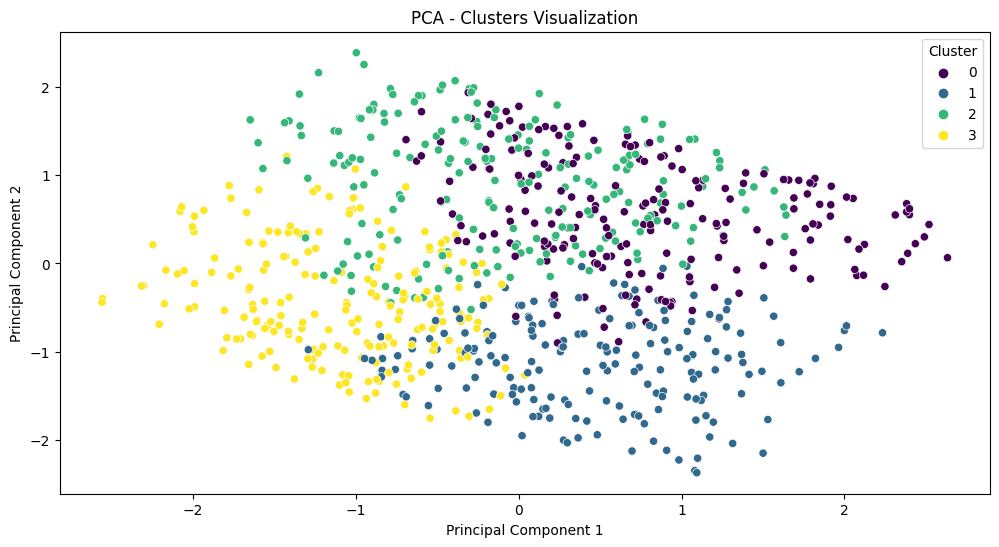

In [20]:
# Step 5: Visualization of Clusters (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis')
plt.title('PCA - Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

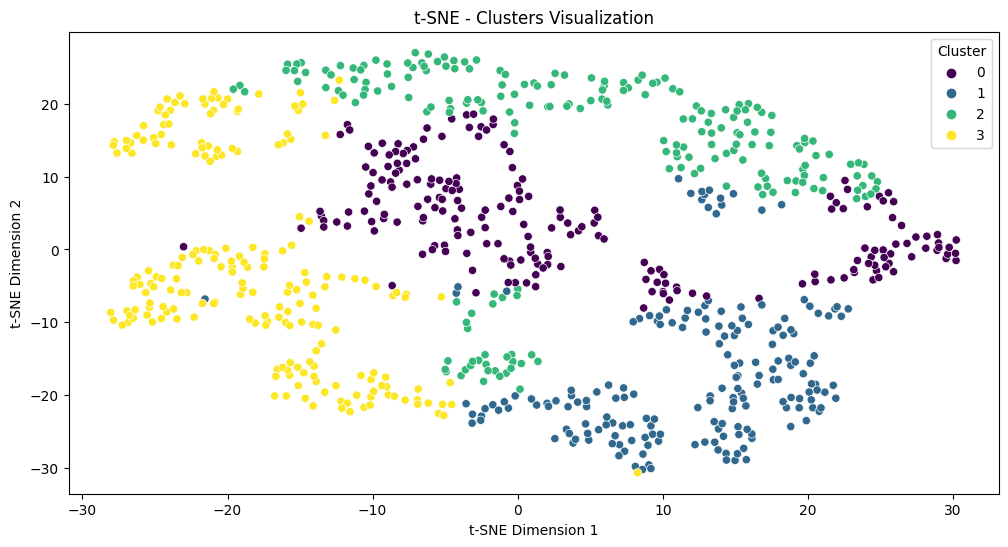

In [21]:
# Step 6: Visualization of Clusters (t-SNE)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=clusters, palette='viridis')
plt.title('t-SNE - Clusters Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()

In [22]:
# Step 7: Evaluation (Silhouette Score)
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2739330519175774


In [23]:
# Step 8: Exploration of Clusters
clustered_data = data.copy()
clustered_data['Cluster'] = clusters
cluster_stats = clustered_data.groupby('Cluster').mean()

print('\nCluster Statistics:')
print(cluster_stats)


Cluster Statistics:
              Tempo  SpectralCentroid    Rhythm
Cluster                                        
0        114.405476       2682.960888  0.744043
1        141.188769       6193.505219  0.611597
2        127.487440       3057.541079  0.216795
3         97.840827       6215.512980  0.437347


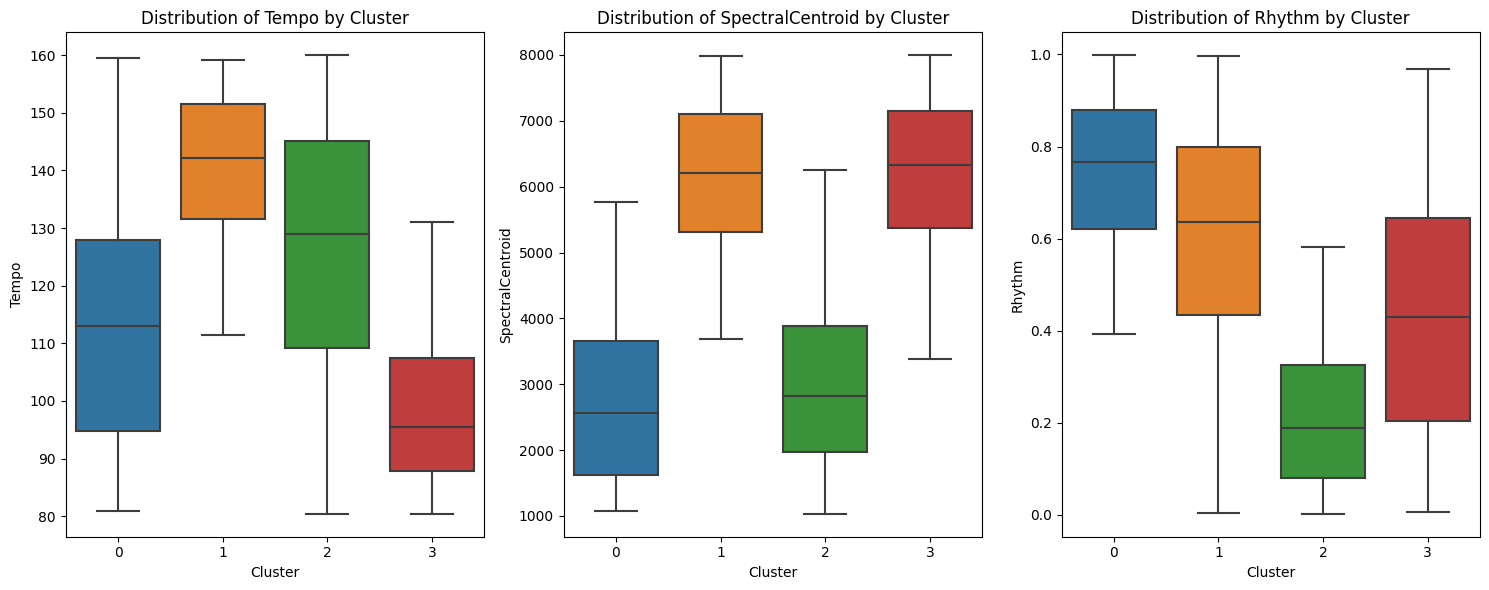

In [24]:
# Step 9: Visualization of Feature Distributions within Clusters
plt.figure(figsize=(15, 6))

for i, feature in enumerate(data.columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=clustered_data)
    plt.title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()